In [19]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('bio copy.csv')
gender = {
    "M":1,
    "F":0
}
df["Gender"] = df["Gender"].map(gender)
df.dropna(inplace=True)

X = df[["Age","Gender","BMI","Body weight ","Height ", "Fasting GLU - PDL (Lab)", "Insulin "]].values
#y = df['Fasting GLU - PDL (Lab)']

In [26]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(X_scaled)


In [27]:
df['Cluster'] = clusters

cluster_means = df.groupby('Cluster')['Fasting GLU - PDL (Lab)'].mean()

cluster_means


Cluster
0     90.25
1    129.90
2    102.00
3    147.00
4    117.50
5    125.75
Name: Fasting GLU - PDL (Lab), dtype: float64

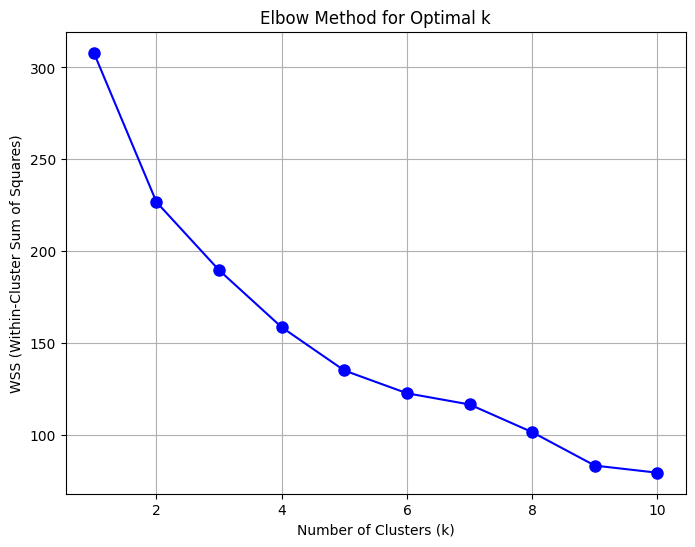

In [ ]:
inertia = []
K = range(1, 11)  # Test cluster sizes from 1 to 10
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-', markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()